# Chapter 25 Uber's Orbit

## Listing 25-1. Importing the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

y = pd.read_csv('heatwave-pageviews-20150701-20250531.csv')
y.columns = ['date', 'y']
y['date'] = pd.to_datetime(y['date'])
y = y[:-5]
y.head()

,date,y
0,2015-07-01,26379
1,2015-08-01,18584
2,2015-09-01,12529
3,2015-10-01,15343
4,2015-11-01,13545


## Listing 25-2. Train Test Split

In [6]:
train = y.iloc[:-12]
test = y.iloc[-12:]

## Listing 25-3. Instantiate the default LGT model

In [7]:
from orbit.models.lgt import LGT

lgt = LGT(
    response_col='y',
    date_col='date',
    seasonality=12,
    seed=123,
)



## Listing 25-4. Fit the model

In [8]:
lgt.fit(df=train)

2025-06-17 20:05:38 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
2025-06-17 20:05:38 - orbit - INFO - Compiling stan model:/opt/anaconda3/envs/chapter25/lib/python3.9/site-packages/orbit/stan/lgt.stan. ETA 3 - 5 mins.
chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                

## Listing 25-5. Predict the LGT model

In [22]:
fcst = lgt.predict(df=test)

In [23]:
fcst

,date,prediction_5,prediction,prediction_95
0,2024-01-01,4326.002904,12499.586343,19796.141890
1,2024-02-01,4573.943522,11792.212060,19249.531257
2,2024-03-01,7738.111719,14913.255658,22350.213258
3,2024-04-01,10507.211610,19484.048125,25882.062643
4,2024-05-01,10644.578766,18176.888196,25502.924607
5,2024-06-01,26462.380776,35486.991264,46433.027468
6,2024-07-01,18900.322105,28163.131027,37967.431046
7,2024-08-01,4644.674841,14313.839618,20820.483025
8,2024-09-01,-1940.368283,8556.604367,16532.990941
9,2024-10-01,-2512.178028,6736.167238,16753.110562


## Listing 25-6. Evaluate the model

In [24]:
actuals = list(test['y'].reset_index(drop=True))
fcst = fcst['prediction']

from sklearn.metrics import mean_absolute_percentage_error
metric = 1 - mean_absolute_percentage_error(actuals, fcst)
print(metric)


0.5809720123540467


## Listing 25-7. Plot the graph

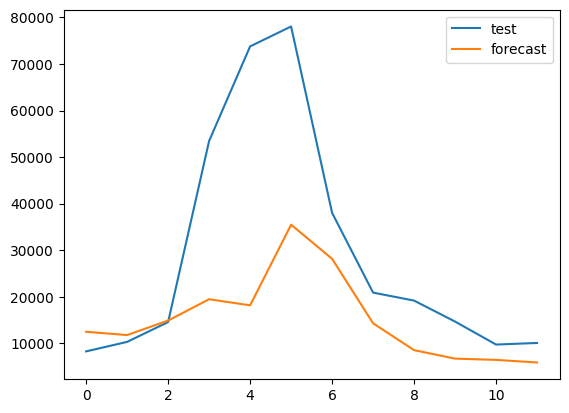

In [25]:
plt.plot(actuals)
plt.plot(fcst)
plt.legend(['test', 'forecast'])
plt.show()


## Listing 25-8. Tuned LGT

In [33]:
results = []
for seasonality_sm_input in [0.1, 0.25, 0.5, 0.75, 0.9]: # A larger value puts more weight on the current seasonality.
    for level_sm_input in [0.1, 0.25, 0.5, 0.75, 0.9]: # A larger value puts more weight on the current level.
        
        
        lgt = LGT(
            response_col='y',
            date_col='date',
            seasonality=12,
            seed=123,
            seasonality_sm_input=seasonality_sm_input,
            level_sm_input=level_sm_input
        )
        
        
        lgt.fit(df=train)
        
        fcst = lgt.predict(df=test)
        
        actuals = list(test['y'].reset_index(drop=True))
        fcst = fcst['prediction']
        
        metric = 1 - mean_absolute_percentage_error(actuals, fcst)
        results.append([seasonality_sm_input, level_sm_input, metric])


results_df=pd.DataFrame(results, columns = ['seasonality_sm_input', 'level_sm_input', 'metric'])
results_df.sort_values('metric', ascending=False).head()


2025-06-17 20:29:06 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:07 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:07 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)g)


chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:29:08 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:08 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:29:09 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:09 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:29:10 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:10 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   

2025-06-17 20:29:11 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
in 2 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:11 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:11 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:12 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:29:12 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)g)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:13 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:13 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:14 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)g)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:14 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:29:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:29:16 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:16 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                     

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:29:17 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
in 2 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:29:17 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     

,seasonality_sm_input,level_sm_input,metric
20,0.90,0.1,0.715469
15,0.75,0.1,0.702552
10,0.50,0.1,0.693794
5,0.25,0.1,0.653431
0,0.10,0.1,0.606013


## Listing 25-9. The best Local Global Trend model

2025-06-17 20:32:00 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
in 2 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     

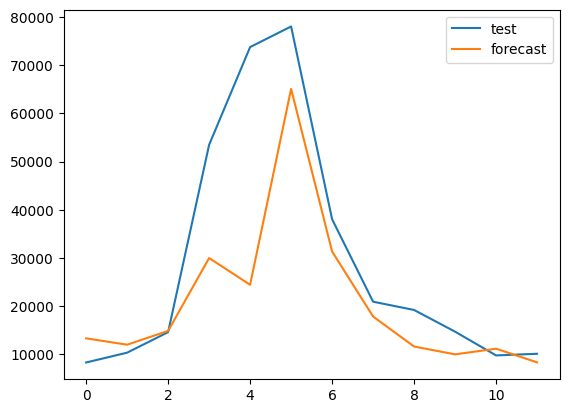

In [38]:
lgt = LGT(
    response_col='y',
    date_col='date',
    seasonality=12,
    seed=123,
    seasonality_sm_input=0.9,
    level_sm_input=0.1
)

lgt.fit(df=train)

fcst = lgt.predict(df=test)

actuals = list(test['y'].reset_index(drop=True))
fcst = fcst['prediction']

plt.plot(actuals)
plt.plot(fcst)
plt.legend(['test', 'forecast'])
plt.show()


## Listing 25-10. Default DLT

In [27]:
from orbit.models.dlt import DLT

dlt = DLT(
    response_col='y',
    date_col='date',
    seasonality=12,
    seed=123,
)



## Listing 25-11. Train the DLT

In [28]:
dlt.fit(df=train)

2025-06-17 20:11:42 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
2025-06-17 20:11:42 - orbit - INFO - Compiling stan model:/opt/anaconda3/envs/chapter25/lib/python3.9/site-packages/orbit/stan/dlt.stan. ETA 3 - 5 mins.
chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00

## Listing 25-12. Forecast using the DLT

In [29]:
fcst = dlt.predict(df=test)
fcst

,date,prediction_5,prediction,prediction_95
0,2024-01-01,7815.762657,15052.022381,21772.561500
1,2024-02-01,5519.051571,12791.435551,21599.806277
2,2024-03-01,6088.620644,15411.510465,22363.441987
3,2024-04-01,11662.315827,21331.884434,31208.695058
4,2024-05-01,11508.224573,20474.202659,31570.946658
5,2024-06-01,28054.495459,39997.158501,53384.027283
6,2024-07-01,20201.521979,31302.333500,40708.644650
7,2024-08-01,5878.731176,15842.307256,26171.539220
8,2024-09-01,-2249.241738,9985.168267,20690.051924
9,2024-10-01,-1853.646987,8668.114178,18729.164324


## Listing 25-13. Evaluate the DLT

In [30]:
actuals = list(test['y'].reset_index(drop=True))
fcst = fcst['prediction']

metric = 1 - mean_absolute_percentage_error(actuals, fcst)
print(metric)


0.6209186381355969


## Listing 25-14. Plot the forecast

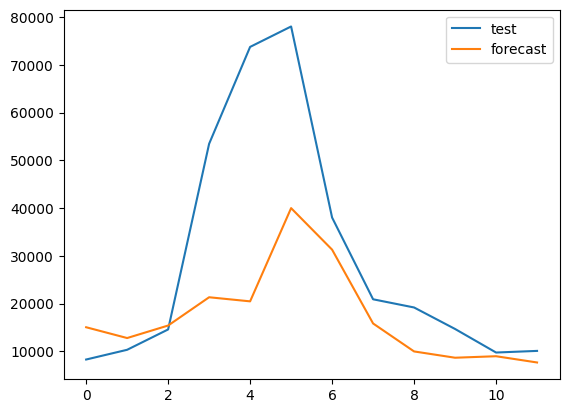

In [31]:
plt.plot(actuals)
plt.plot(fcst)
plt.legend(['test', 'forecast'])
plt.show()


## Listing 25-15. Tune the DLT model

In [39]:

results = []
for seasonality_sm_input in [0.1, 0.5, 0.9]: # A larger value puts more weight on the current seasonality.
    for level_sm_input in [0.1,  0.5, 0.9]: # A larger value puts more weight on the current level.
        for damped_factor in [0.1,  0.5, 0.9]: # A smaller value further dampens the previous global trend value.
            for global_trend_option in ['linear', 'loglinear', 'logistic', 'flat']: # Transformation function for the shape of the forecasted global trend.
                
                dlt = DLT(
                    response_col='y',
                    date_col='date',
                    seasonality=12,
                    seed=123,
                    seasonality_sm_input=seasonality_sm_input,
                    level_sm_input=level_sm_input,
                    damped_factor=damped_factor,
                    global_trend_option=global_trend_option
                )
                
                
                dlt.fit(df=train)
                
                fcst = dlt.predict(df=test)
                
                actuals = list(test['y'].reset_index(drop=True))
                fcst = fcst['prediction']
                
                metric = 1 - mean_absolute_percentage_error(actuals, fcst)
                results.append([seasonality_sm_input, level_sm_input, damped_factor, global_trend_option, metric])


results_df=pd.DataFrame(results, columns = ['seasonality_sm_input', 'level_sm_input', 'damped_factor', 'global_trend_option', 'metric'])
results_df.sort_values('metric', ascending=False).head()

2025-06-17 20:42:55 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:42:56 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:42:57 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:42:58 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:42:58 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:42:59 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:01 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:01 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:02 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:03 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:04 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:43:04 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:05 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:06 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:08 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:08 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:09 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:01 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:10 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:11 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   g)

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:43:11 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:12 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:13 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:14 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:17 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:18 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   g)

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:43:18 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:43:19 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:20 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:21 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:21 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:22 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:23 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:24 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   g)

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:25 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)g)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:25 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:26 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:27 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:28 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:29 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:30 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:31 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:31 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:32 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:33 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:01 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   
chain 4 |██████████| 00:01 Sampling completed                     


2025-06-17 20:43:34 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:34 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:35 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:36 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   

2025-06-17 20:43:37 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:38 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:38 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:39 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:43:41 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                     


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:41 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:42 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:43 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:44 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:45 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:43:45 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:46 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:47 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:48 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:48 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:49 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:50 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:51 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:51 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:53 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:53 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:54 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:54 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:55 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:56 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                     


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:57 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:58 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:43:59 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:00 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:00 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:01 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:02 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   
chain 4 |██████████| 00:01 Sampling completed                     


2025-06-17 20:44:03 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                     

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:44:04 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:04 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:05 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:07 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:07 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |██████████| 00:00 Iteration: 200 / 250 [ 80%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:08 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:09 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:01 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   
chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:10 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     

chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:10 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:11 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:12 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:01 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:01 Sampling completed                   
chain 2 |██████████| 00:01 Sampling completed                   
chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:13 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   g)

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:14 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
in 2 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:44:14 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:15 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:16 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

3 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                     

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:44:17 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                     

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:17 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:19 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   
chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:20 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:20 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   g)

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:44:21 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:01 Sampling completed                   

chain 2 |██████████| 00:01 Sampling completed                   


chain 3 |██████████| 00:01 Sampling completed                   



chain 4 |██████████| 00:01 Sampling completed                   


2025-06-17 20:44:22 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


          | 00:00 Status

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                   
chain 2 |██████████| 00:00 Sampling completed                   


chain 3 |██████████| 00:00 Sampling completed                   



chain 4 |██████████| 00:00 Sampling completed                   


2025-06-17 20:44:23 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


          | 00:00 Iteration: 226 / 250 [ 90%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                   g)
chain 2 |██████████| 00:00 Sampling completed                     


chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                     


2025-06-17 20:44:24 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)

3 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                   
chain 4 |██████████| 00:00 Sampling completed                   

,seasonality_sm_input,level_sm_input,damped_factor,global_trend_option,metric
75,0.9,0.1,0.1,flat,0.714176
73,0.9,0.1,0.1,loglinear,0.708693
79,0.9,0.1,0.5,flat,0.705170
72,0.9,0.1,0.1,linear,0.704368
77,0.9,0.1,0.5,loglinear,0.704148


## Listing 25-16. Best tuned DLT

2025-06-17 20:47:59 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
chain 1 |          | 00:00 Status
in 2 |          | 00:00 Status

3 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

3 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)

chain 1 |███████▌  | 00:00 Iteration: 100 / 250 [ 40%]  (Warmup)g)
in 2 |█████     | 00:00 Iteration:   1 / 250 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                   

chain 2 |██████████| 00:00 Sampling completed                   
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                   

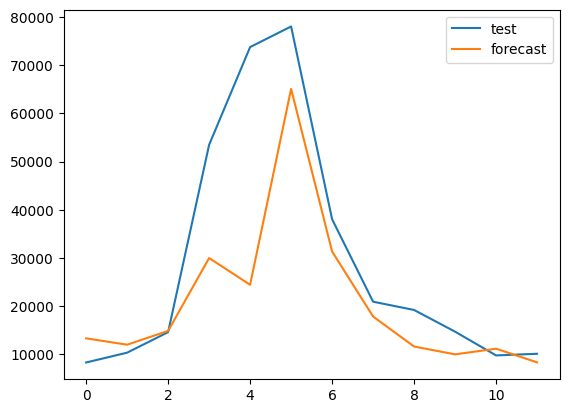

In [42]:
dlt = DLT(
    response_col='y',
    date_col='date',
    seasonality=12,
    seed=123,
    seasonality_sm_input=0.9,
    level_sm_input=0.1,
    damped_factor=0.1,
    global_trend_option='flat'
)

dlt.fit(df=train)

fcst = lgt.predict(df=test)

actuals = list(test['y'].reset_index(drop=True))
fcst = fcst['prediction']

plt.plot(actuals)
plt.plot(fcst)
plt.legend(['test', 'forecast'])
plt.show()
